<h1>Tesla Battery Degradation</h1>

Every Tesla driver is provided with a warranty for battery failure which doesn’t cover degradation. Degradation is equivalent to the decrease in battery capacity over time which leads to the decrease in range (miles) that a Tesla driver can drive before he has to re-charge his battery again. The provided data set includes data collected from Tesla owners in US, Canada, and Asia/Europe. It includes information about the battery capacity change with respect to time, average mileage per day, lifetime average energy consumption, and the change in the remaining range of the battery. The purpose of this project is determine whether the battery degradation takes place and how much it affects the car range with respect to time.

<h2>Dataset</h2>

The data is available in the form of a survey provided by Tesla drivers in US, Canada, and Asia/Europe and posted at https://docs.google.com/spreadsheets/d/t024bMoRiDPIDialGnuKPsg/edit#gid=1669966328

The columns in the original data set have very long titles and were renamed for convenience. Here is the list of columns available in the original .xlsx file: 

<table>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">column name</th>
        <th style="text-align: left; font-size: 14px;">description</th>
        <th style="text-align: left; font-size: 14px;">type of survey information</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">id</th>
        <th style="text-align: left; font-size: 14px;">user ID</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">username</th>
        <th style="text-align: left; font-size: 14px;">Username (can be anything inoffensive)</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">location</th>
        <th style="text-align: left; font-size: 14px;">Location (Asia & Europe, USA, Canada, or UK) </th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">manufacture_date</th>
        <th style="text-align: left; font-size: 14px;">date of car manufacturing</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_reading_date</th>
        <th style="text-align: left; font-size: 14px;">date when the measurements were taken</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">model</th>
        <th style="text-align: left; font-size: 14px;">Type of Tesla model S (numbers reflect battery capacity), P stands for performance (higher HP), and D stand for higher range (usually up to 10 miles)</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">mileage</th>
        <th style="text-align: left; font-size: 14px;">Car mileage in miles (or km) </th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">mileage_per_day</th>
        <th style="text-align: left; font-size: 14px;">Mileage per day (mi/day) or (km/day) </th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_at_full</th>
        <th style="text-align: left; font-size: 14px;">Typical range at 100% charge in mi or km</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_mode</th>
        <th style="text-align: left; font-size: 14px;">>Range mode on or off at the time of reading</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_after_correction</th>
        <th style="text-align: left; font-size: 14px;">Typical range adjusted with respect to range mode</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">battery_replacement</th>
        <th style="text-align: left; font-size: 14px;">Did you have a battery replacement?</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">change_after_replacement</th>
        <th style="text-align: left; font-size: 14px;">What happened to typical range after replacement?</th>
        <th style="text-align: left; font-size: 14px;">required if battery was replaced</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_at_replacement</th>
        <th style="text-align: left; font-size: 14px;">At what mileage did you replace the battery?</th>
        <th style="text-align: left; font-size: 14px;">required if battery was replaced</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">mileage_after_replacement</th>
        <th style="text-align: left; font-size: 14px;">Corrected mileage if battery was replaced</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">battery_age</th>
        <th style="text-align: left; font-size: 14px;">Battery age in days</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">lifetime_avg_energy_consumption</th>
        <th style="text-align: left; font-size: 14px;">Lifetime average energy consumption at the time of reading in Wh/km</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_when_new</th>
        <th style="text-align: left; font-size: 14px;">Typical range of this model when new</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">remaining_range</th>
        <th style="text-align: left; font-size: 14px;">Remaining original range</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">remaining_capacity</th>
        <th style="text-align: left; font-size: 14px;">Remaining usable capacity until typical range shows zero</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">unanswered</th>
        <th style="text-align: left; font-size: 14px;">Unanswered questions</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">supercharging_frequency</th>
        <th style="text-align: left; font-size: 14px;">Frequency of supercharging</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">full_charge_frequency</th>
        <th style="text-align: left; font-size: 14px;">Frequency of 100% charge</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">empty_charge_frequency</th>
        <th style="text-align: left; font-size: 14px;">Frequency of almost empty (8km or less)</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">daily_charge</th>
        <th style="text-align: left; font-size: 14px;">Daily charge level</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">daily_charge_power</th>
        <th style="text-align: left; font-size: 14px;">Daily charge power in kW</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">new_car_range</th>
        <th style="text-align: left; font-size: 14px;">What was 100% typical range when the car was new?</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_mode_new</th>
        <th style="text-align: left; font-size: 14px;">Range mode on/off at time of reading previous column?</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
</table>

<h2>Data Wrangling</h2>

Download the MaxRange Tesla Battery Survey.xlsx file from Google drive. Import and inspect raw data. Isolate relevant variables and organize the dataframe. Resolve missing, invalid, corrupted or duplicate values.

<h3>Import packages and create a data frame from Excel file</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tesla_xls = pd.ExcelFile('MaxRange Tesla Battery Survey.xlsx')
tesla_xls.sheet_names

[u'Asia Pacific & Europe (excl UK)',
 u'Canada',
 u'USA',
 u'UK',
 u'Range Units',
 u'Feedback',
 u'Charts',
 u'Stats',
 u'Charts Data',
 u'Administrative',
 u'Editor Comments',
 u'Stats Data',
 u'Temperature effect',
 u'Column names compared']

In [2]:
#create a data frame for Asia Pacific and Europe
asia_pacific_europe = tesla_xls.parse('Asia Pacific & Europe (excl UK)',skiprows=2)

In [3]:
#obtain information about any null elements in the data frame
asia_pacific_europe.isnull().sum()

ID                                                                                   0
Username (can be anything inoffensive)                                              30
Location                                                                            30
Vehicle manufacture date (double click empty cell)                                  33
Date of range reading\n(double click empty cell)                                    30
Model                                                                               30
Mileage in km                                                                       30
Mileage per day                                                                     33
Typical Range at 100% charge\nin km                                                 30
Range mode on/off at time of reading?                                               30
Typical range after correction if range mode was off                                30
Did you have a battery replacement?        

In [4]:
#drop any null rows which don't contain any data
asia_pacific_europe = asia_pacific_europe.dropna(subset=['Location'])

In [5]:
#create a data frame for Canada
canada = tesla_xls.parse('Canada',skiprows=2)

In [6]:
canada.tail()

,ID,Username (can be anything inoffensive),Location,Vehicle manufacture date (double click empty cell),Date of range reading (double click empty cell),Model,Mileage in km,Mileage per day,EPA rated range at 100% charge in km,Range mode on/off at time of reading?,...,Average capacity of all cars at this mileage according to chart trendline,Your capacity minus chart trendline at this mileage,Dynamic data (copy from here),Static data (paste values here),Mixed data,Data changed or new data?,Display changes,Dynamic data changes for selected entry,Static data changes for selected entry,"Blank column for arrayformula in ""Charts Data"""
67,68,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,69,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,70,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,72,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop any null rows which don't contain any data
canada = canada.dropna(subset=['Location'])

In [8]:
#create a data frame for usa
usa = tesla_xls.parse('USA',skiprows=2)

In [9]:
usa = usa.dropna(subset=['Location'])

In [10]:
#create a data frame for uk
uk = tesla_xls.parse('UK',skiprows=2)

In [11]:
uk = uk.dropna(subset=['Location'])

In [12]:
print(len(asia_pacific_europe.index)+len(usa.index)+len(canada.index)+len(uk.index))

1156


The names of the columns are too descriptive and long for analyzing. Therefore, we can rename the columns before merging them together.

In [13]:
#rename the columns
new_column_names = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',  'mileage',
                    'mileage_per_day', 'range_at_full', 'range_mode', 'range_after_correction', 'battery_replacement',
                    'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                    'battery_age', 'lifetime_avg_energy_consumption', 'range_when_new', 'remaining_range','remaining_capacity',
                   'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                   'new_car_range', 'range_mode_new', 'typical_range_trip_start', 'typical_range_trip_end', 'trip_consumption',
                   'range_mode_trip','comments','typical_range_consumption','typical_range_correction','remaining_usable_capacity',
                   'remaining_original_capacity','trip_based_capacity','range_mode_adjustment','vehicle_age','vehicle_cycles',
                   'mileage_in_km','wh_km','used_for_chart','average_capacity_according_to_chart','deviation_in_capacity', 'dynamic_data',
                   'static_data','mixed_data','book_keeping1', 'book_keeping2', 'book_keeping3', 'book_keeping4', 'book_keeping5']
len(new_column_names)

54

In [14]:
#rename the columns of each data frame
canada.columns = new_column_names
asia_pacific_europe.columns = new_column_names
uk.columns = new_column_names
usa.columns = new_column_names

In [15]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 54 columns):
id                                     41 non-null int64
username                               41 non-null object
location                               41 non-null object
manufacture_date                       41 non-null datetime64[ns]
range_reading_date                     41 non-null datetime64[ns]
model                                  41 non-null object
mileage                                41 non-null float64
mileage_per_day                        41 non-null float64
range_at_full                          41 non-null float64
range_mode                             41 non-null object
range_after_correction                 41 non-null float64
battery_replacement                    41 non-null object
change_after_replacement               1 non-null object
range_at_replacement                   1 non-null float64
mileage_after_replacement              41 non-null float64
battery_

In [16]:
usa.head()

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,average_capacity_according_to_chart,deviation_in_capacity,dynamic_data,static_data,mixed_data,book_keeping1,book_keeping2,book_keeping3,book_keeping4,book_keeping5
0,1,Muzzman1,USA,2014-03-22,2014-04-08,Model S 85,2000.0,111.1,271.0,On,...,0.993895,0.013505,Muzzman1|USA|22-Mar-2014|08-Apr-2014|Model S 8...,Muzzman1|USA|22-Mar-2014|08-Apr-2014|Model S 8...,Muzzman1|USA|22-Mar-2014|08-Apr-2014|Model S 8...,NaN,NaN,NaN,NaN,NaN
1,2,Muzzman1,USA,2014-03-22,2015-04-16,Model S 85,21000.0,53.7,256.0,On,...,0.963030,-0.011330,Muzzman1|USA|22-Mar-2014|16-Apr-2015|Model S 8...,Muzzman1|USA|22-Mar-2014|16-Apr-2015|Model S 8...,Muzzman1|USA|22-Mar-2014|16-Apr-2015|Model S 8...,NaN,NaN,NaN,NaN,NaN
2,3,ghurenkamp,USA,2013-06-07,2015-05-11,Model S P85,43715.0,62.1,251.0,Off,...,0.950681,-0.005781,ghurenkamp|USA|07-Jun-2013|11-May-2015|Model S...,ghurenkamp|USA|07-Jun-2013|11-May-2015|Model S...,ghurenkamp|USA|07-Jun-2013|11-May-2015|Model S...,NaN,NaN,NaN,NaN,NaN
3,4,KL,USA,2015-02-28,2015-05-11,Model S 85D,13679.0,187.4,269.0,Off,...,0.970874,0.026926,KL|USA|28-Feb-2015|11-May-2015|Model S 85D|136...,KL|USA|28-Feb-2015|11-May-2015|Model S 85D|136...,KL|USA|28-Feb-2015|11-May-2015|Model S 85D|136...,NaN,NaN,NaN,NaN,NaN
4,5,terrymisu,USA,2015-05-07,2015-05-28,Model S P85D,1061.0,48.2,253.0,On,...,0.996655,-0.008355,terrymisu|USA|07-May-2015|28-May-2015|Model S ...,terrymisu|USA|07-May-2015|28-May-2015|Model S ...,terrymisu|USA|07-May-2015|28-May-2015|Model S ...,NaN,NaN,NaN,NaN,NaN


In [17]:
#convert range column from km to miles
canada.range_when_new *= 0.621371
asia_pacific_europe.range_when_new *= 0.621371
canada.mileage_per_day *= 0.621371
asia_pacific_europe.mileage_per_day *= 0.621371

Now, we can merge the dataframes corresponding to different locations.

In [18]:
#merge the location data frames to obtain one data frame for tesla survey
locations = [asia_pacific_europe, usa, canada, uk]
tesla_survey = pd.concat(locations,ignore_index=True)

#inspect the master data frame for tesla survey
tesla_survey['id'] = tesla_survey.index.values+1

In [19]:
tesla_survey.tail(10)

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,average_capacity_according_to_chart,deviation_in_capacity,dynamic_data,static_data,mixed_data,book_keeping1,book_keeping2,book_keeping3,book_keeping4,book_keeping5
1146,1147,Simon Mac,UK,2014-05-21,2015-10-23,Model S 60,10500.0,20.2,180.0,On,...,0.975515,0.024485,Simon Mac|UK|21-May-2014|23-Oct-2015|Model S 6...,Simon Mac|UK|21-May-2014|23-Oct-2015|Model S 6...,Simon Mac|UK|21-May-2014|23-Oct-2015|Model S 6...,NaN,NaN,NaN,NaN,NaN
1147,1148,memesweeper,UK,2015-10-12,2016-11-02,Model S 85D,34653.0,89.3,256.0,Off,...,0.954385,0.016515,memesweeper|UK|12-Oct-2015|02-Nov-2016|Model S...,memesweeper|UK|12-Oct-2015|02-Nov-2016|Model S...,memesweeper|UK|12-Oct-2015|02-Nov-2016|Model S...,NaN,NaN,NaN,NaN,NaN
1148,1149,gyroscope,UK,2015-05-14,2016-11-20,Model S 85,45959.0,82.5,231.0,Off,...,0.949890,-0.006690,gyroscope|UK|14-May-2015|20-Nov-2016|Model S 8...,gyroscope|UK|14-May-2015|20-Nov-2016|Model S 8...,gyroscope|UK|14-May-2015|20-Nov-2016|Model S 8...,NaN,NaN,NaN,NaN,NaN
1149,1150,tes,UK,2015-03-02,2016-12-14,Model S 85,37895.0,57.9,238.0,On,...,0.952944,0.006756,tes|UK|02-Mar-2015|14-Dec-2016|Model S 85|3789...,tes|UK|02-Mar-2015|14-Dec-2016|Model S 85|3789...,tes|UK|02-Mar-2015|14-Dec-2016|Model S 85|3789...,NaN,NaN,NaN,NaN,NaN
1150,1151,4dme,UK,2016-06-20,2016-12-24,Model S 85,16800.0,89.4,242.0,Off,...,0.967119,0.020981,4dme|UK|20-Jun-2016|24-Dec-2016|Model S 85|168...,4dme|UK|20-Jun-2016|24-Dec-2016|Model S 85|168...,4dme|UK|20-Jun-2016|24-Dec-2016|Model S 85|168...,NaN,NaN,NaN,NaN,NaN
1151,1152,Justin,UK,2016-01-06,2017-04-25,Model S 85D,49129.0,103.2,266.0,Off,...,0.948833,0.060067,Justin|UK|06-Jan-2016|25-Apr-2017|Model S 85D|...,Justin|UK|06-Jan-2016|25-Apr-2017|Model S 85D|...,Justin|UK|06-Jan-2016|25-Apr-2017|Model S 85D|...,NaN,NaN,NaN,NaN,NaN
1152,1153,Patrick,UK,2014-12-30,2017-04-17,Model S 85,49900.0,59.4,239.0,On,...,0.948585,0.015115,Patrick|UK|30-Dec-2014|17-Apr-2017|Model S 85|...,Patrick|UK|30-Dec-2014|17-Apr-2017|Model S 85|...,Patrick|UK|30-Dec-2014|17-Apr-2017|Model S 85|...,NaN,NaN,NaN,NaN,NaN
1153,1154,Gary,UK,2017-03-17,2017-04-22,Model S 60D,2271.0,61.4,205.0,Off,...,0.993132,0.009768,Gary|UK|17-Mar-2017|22-Apr-2017|Model S 60D|22...,Gary|UK|17-Mar-2017|22-Apr-2017|Model S 60D|22...,Gary|UK|17-Mar-2017|22-Apr-2017|Model S 60D|22...,NaN,NaN,NaN,NaN,NaN
1154,1155,John,UK,NaT,2017-08-18,Model S 75D,3000.0,NaN,238.7,On,...,0.991147,-0.000647,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,NaN,NaN,NaN,NaN,NaN
1155,1156,DH12345,UK,2015-03-01,2017-10-04,Model S 85,58633.0,61.8,241.0,On,...,0.945952,0.025848,DH12345|UK|01-Mar-2015|04-Oct-2017|Model S 85|...,DH12345|UK|01-Mar-2015|04-Oct-2017|Model S 85|...,DH12345|UK|01-Mar-2015|04-Oct-2017|Model S 85|...,NaN,NaN,NaN,NaN,NaN


Now, we can eliminate the last 5 columns denoted with "book_keeping...". They are used by the owner of the google spreadsheet document to make sure that no "cell vandalism" took place as the document is available for anyone. We do not need this information for analysis as it is evident that no rows were changed.

In [20]:
#remove null book_keeping attributes
columns_to_remove = ['book_keeping1','book_keeping2','book_keeping3', 'book_keeping4', 'book_keeping5']
tesla_survey.drop(columns_to_remove, inplace=True, axis=1)

In [21]:
#determining the null values in each column
tesla_survey.isnull().sum()

id                                        0
username                                  0
location                                  0
manufacture_date                          4
range_reading_date                        0
model                                     0
mileage                                   0
mileage_per_day                           4
range_at_full                             0
range_mode                                0
range_after_correction                    0
battery_replacement                       0
change_after_replacement               1090
range_at_replacement                   1091
mileage_after_replacement                 0
battery_age                               4
lifetime_avg_energy_consumption          14
range_when_new                            0
remaining_range                           0
remaining_capacity                        0
unanswered                                0
supercharging_frequency                  96
full_charge_frequency           

It is evident that most users decided not to provide optional information about the typical range of consumption for their last trip (columns "typical_range_trip_start":"trip_based_capacity"). Therefore, these columns should be excluded.

In [22]:
columns_to_remove = ['typical_range_trip_start','typical_range_trip_end','trip_consumption', 'range_mode_trip', 
                     'typical_range_consumption', 'typical_range_correction','remaining_usable_capacity',
                    'remaining_original_capacity','trip_based_capacity']
tesla_survey.drop(columns_to_remove, inplace=True, axis=1)

"used_for_chart" information is used for plotting data in excel. We can eliminate it from the data frame.

In [23]:
tesla_survey.drop('used_for_chart', inplace=True, axis=1)

It seems like there are some points that do not have a date of car manufacturing which makes it impossible to calculate the age of the battery and mileage per day. However, these values still provide information about the total mileage of the car as well as remaining capacity. We will have to exclude these 4 values when we explore the dependence of the range on battery age and mileage per day. 

In [24]:
tesla_survey[tesla_survey.manufacture_date.isnull()]

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,range_mode_adjustment,vehicle_age,vehicle_cycles,mileage_in_km,wh_km,average_capacity_according_to_chart,deviation_in_capacity,dynamic_data,static_data,mixed_data
73,74,RealNuke,Asia Pacific & Europe (excl UK),NaT,2015-01-15,Unspecified 85 kWh,32080.0,NaN,380.0,Off,...,NaN,NaN,113.93,32080.0,270.0,0.963979,-0.001979,RealNuke|Asia Pacific & Europe (excl UK)|30-De...,RealNuke|Asia Pacific & Europe (excl UK)|30-De...,RealNuke|Asia Pacific & Europe (excl UK)|30-De...
218,219,Eelcodb,Asia Pacific & Europe (excl UK),NaT,2015-07-31,Model S 85,13200.0,NaN,384.0,Off,...,NaN,NaN,33.99,13200.0,197.0,0.979508,-0.004908,Eelcodb|Asia Pacific & Europe (excl UK)|30-Dec...,Eelcodb|Asia Pacific & Europe (excl UK)|30-Dec...,Eelcodb|Asia Pacific & Europe (excl UK)|30-Dec...
881,882,Dakine,Asia Pacific & Europe (excl UK),NaT,2017-09-28,Model S 75,14806.0,NaN,379.0,Off,...,NaN,NaN,NaN,14806.0,NaN,0.977701,0.016599,Dakine|Asia Pacific & Europe (excl UK)|30-Dec-...,Dakine|Asia Pacific & Europe (excl UK)|30-Dec-...,Dakine|Asia Pacific & Europe (excl UK)|30-Dec-...
1154,1155,John,UK,NaT,2017-08-18,Model S 75D,3000.0,NaN,238.7,On,...,NaN,NaN,12.66,4828.0,190.0,0.991147,-0.000647,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...


In [25]:
columns_to_remove = ['dynamic_data', 'static_data', 'mixed_data']
tesla_survey.drop(columns_to_remove, inplace=True, axis=1)
tesla_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 36 columns):
id                                     1156 non-null int64
username                               1156 non-null object
location                               1156 non-null object
manufacture_date                       1152 non-null datetime64[ns]
range_reading_date                     1156 non-null datetime64[ns]
model                                  1156 non-null object
mileage                                1156 non-null float64
mileage_per_day                        1152 non-null float64
range_at_full                          1156 non-null float64
range_mode                             1156 non-null object
range_after_correction                 1156 non-null float64
battery_replacement                    1156 non-null object
change_after_replacement               66 non-null object
range_at_replacement                   65 non-null float64
mileage_after_replacement            

<h3>Data exploration</h3>

<h4>Model</h4>

Questions:
1. What kind of models were logged in?
2. Are all models S?
3. What is the difference among models? 
4. Does model affect the rate of battery degradation?

Next, we can check how many unique models were reported by users. It seems like the majority of the models are S with varying range which depends on the battery size and P(performance) as well as the presence of dual motor (D) which increases the range by 10 miles.

In [27]:
tesla_survey.model.value_counts()

Model S 85            439
Model S P85           163
Model S 85D           101
Model S 70D            90
Model S 90D            83
Model S P85D           81
Model S 60             44
Model S P85+           42
Model S 75             28
Unspecified 85 kWh     24
Model S 90D 2015       14
Model S 75D            11
Model S 70              7
Model X 90D             7
Model S 60D             5
Model S P90D            5
Model X 100D            4
Model S P100D           4
Model S 90              2
Model X P90D            1
Model X 60D             1
Name: model, dtype: int64

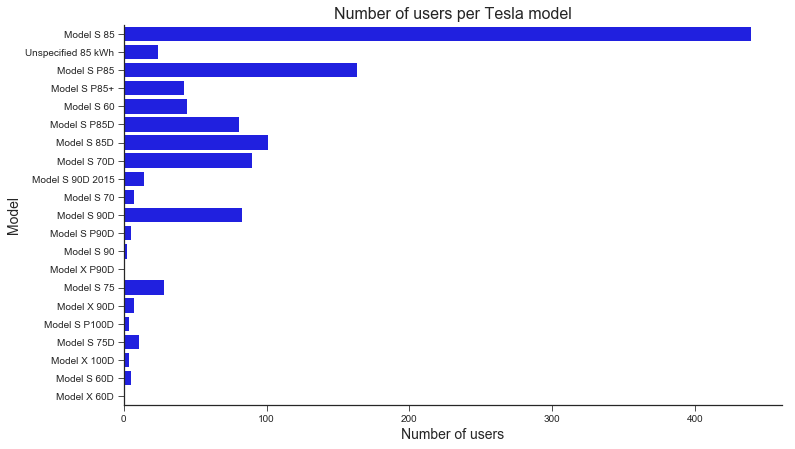

In [28]:
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.figure(figsize=(11.8, 7))
sns.countplot(data=tesla_survey, y='model', color='blue')
sns.despine()
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Number of users per Tesla model', fontsize=16)
plt.show()

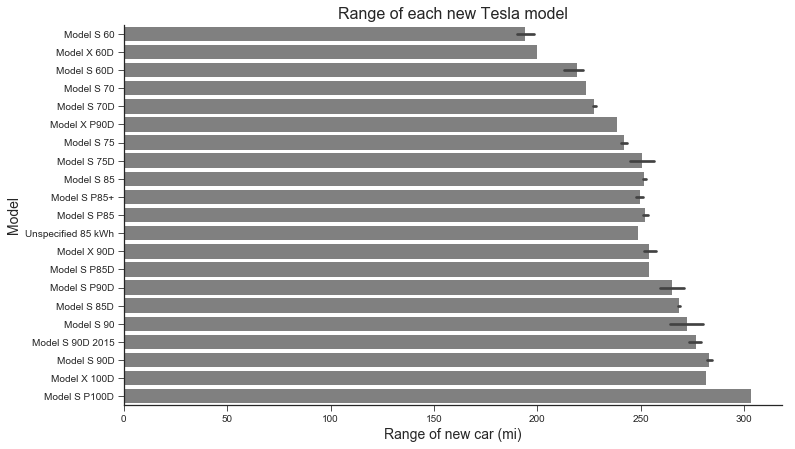

In [29]:
#check how the range of the battery is affected by model
sns.set_style('whitegrid')
sns.set_style('ticks')
result = tesla_survey.groupby(['model'])['range_when_new'].aggregate(np.median).reset_index().sort_values('range_when_new')
plt.figure(figsize=(11.8, 7))
sns.barplot(data=tesla_survey, x='range_when_new', y='model', color='grey', order=result['model'])
sns.despine()
plt.xlabel('Range of new car (mi)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Range of each new Tesla model', fontsize=16)
plt.show()

As expected, the models with the highest range have the largest battery size and dual-engine configuration (S P100D). Model with the lowest range is a basic S 60 with no additional packages. 

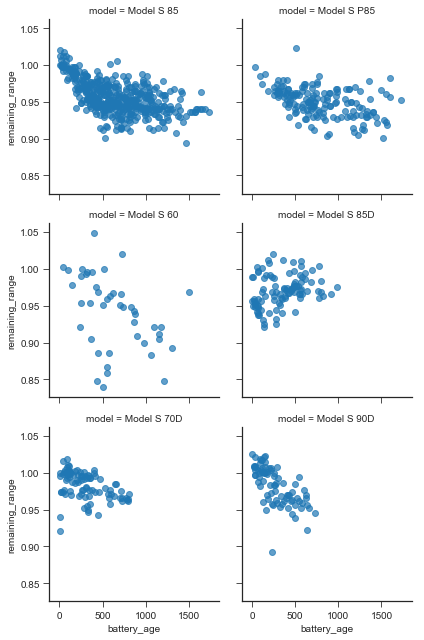

In [30]:
#check how remaining range is affected by battery age for each model
popular_models = ['Model S 85','Model S P85','Model S 85D','Model S 70D','Model S 90D','Model S 60' ]
tesla_popular_models = tesla_survey[tesla_survey['model'].isin(popular_models)]
g = sns.FacetGrid(tesla_popular_models, col='model', margin_titles=True, col_wrap=2)
g.map(plt.scatter, "battery_age", "remaining_range", alpha=0.7)
plt.show()

From the graphs for the remaining range with respect to the battery age (in days), we can see that the range is affected by the battery age. It decreases linearly for smaller capacity models (like Tesla S 60) and flattens out for models in a bigger capacity range (like Tesla S 85, P85, and 90D). This might be attributed to the fact that battery degrades faster if it is smaller.

<h4>Exploration of quantitative characteristics</h4>

Before a model is developed, it is important to explore any quantitative aspects of the data frame generated from the Tesla survey. First, we can construct a heatmap showing the correlation between different features of the Tesla survey. Cells in green show positive correlation while cells in red show negative correlation

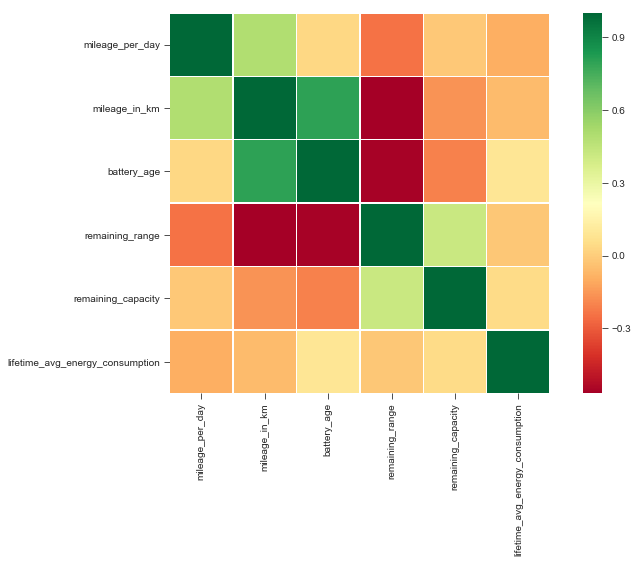

In [31]:
#create a heatmap showing the correlation between different columns of tesla_survey
columns_to_correlate = ['location', 'manufacture_date', 'range_reading_date','mileage_per_day','mileage_in_km',
                        'battery_age', 'remaining_range', 'remaining_capacity', 'lifetime_avg_energy_consumption']
tesla_corr = tesla_survey[columns_to_correlate]
plt.figure(figsize=(11.8, 7))
sns.heatmap(tesla_corr.corr(), square=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

As expected, mileage and remaining range of the battery are negatively correlated. The battery age also negatively affects the remaining range. 

<h5>Mileage</h5>

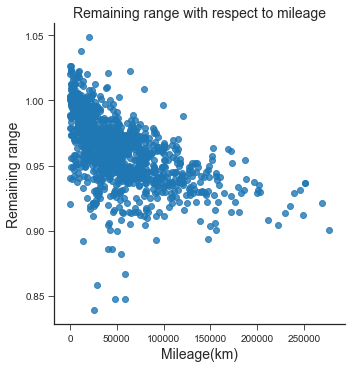

In [32]:
#plot remaining range vs mileage
sns.lmplot('mileage_in_km', 'remaining_range', tesla_survey, fit_reg=False)
plt.title('Remaining range with respect to mileage', fontsize=14)
plt.xlabel('Mileage(km)', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

Remaining range is negatively correlated with mileage. It seems like the majority of the data points are concentrated around 50000 km. The tail of the scatter graph is more sparse which means that the prediction for cars with higher mileage would be less effective. However, it is evident that battery degradation is quite low (< 10%) as majority of the points are above 90% of remaining capacity. 

<h5>Battery age</h5>

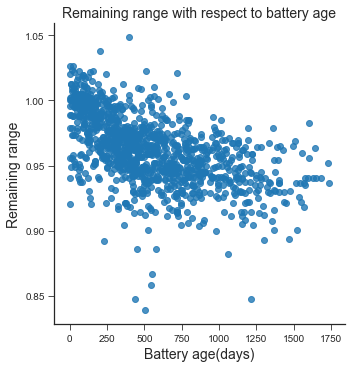

In [33]:
#plot remaining range vs battery age
sns.lmplot('battery_age', 'remaining_range', tesla_survey, fit_reg=False)
plt.title('Remaining range with respect to battery age', fontsize=14)
plt.xlabel('Battery age(days)', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

Remaining range is negatively correlated with battery age. The majority of the cars (72%) are less than 2 years old which makes battery age a less reliable predictor of the degradation. 

In [36]:
more_year = tesla_survey.battery_age >= 365
less_2_years = tesla_survey.battery_age <= 730
battery_age = {'1 year and less': len(tesla_survey[tesla_survey.battery_age < 365]), 
    '1 year - 2 years': len(tesla_survey[more_year & less_2_years]),
               '2 years and more': len(tesla_survey[tesla_survey.battery_age > 730])}
battery_age

{'1 year - 2 years': 386, '1 year and less': 446, '2 years and more': 320}

In [37]:
battery_age_groups = pd.DataFrame.from_dict(battery_age, orient='index')
battery_age_groups.columns = ['Total number of cars']
battery_age_groups['Percentage'] = battery_age_groups['Total number of cars']*100/1152
battery_age_groups

,Total number of cars,Percentage
1 year - 2 years,386,33.506944
1 year and less,446,38.715278
2 years and more,320,27.777778


<h5>Vehicle cycles</h5>

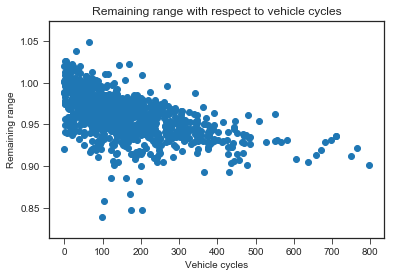

In [41]:
plt.scatter(tesla_survey['vehicle_cycles'], tesla_survey['remaining_range'])
plt.xlabel('Vehicle cycles')
plt.ylabel('Remaining range')
plt.title('Remaining range with respect to vehicle cycles')
plt.show()

Remaining range is negatively correlated with the number of cycles which implies that more frequent charging might contribute to battery degradation.

<h5>Rated range when new</h5>

This variable might help us deterimine how the original range of the new car which is determined by the battery size can influence the remaining range.

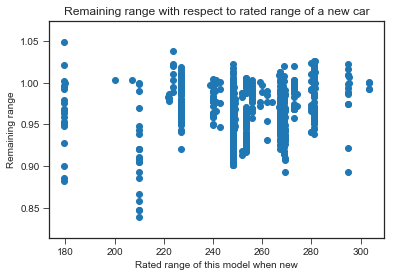

In [44]:
plt.scatter(tesla_survey['range_when_new'], tesla_survey['remaining_range'])
plt.xlabel('Rated range of this model when new')
plt.ylabel('Remaining range')
plt.title('Remaining range with respect to rated range of a new car')
plt.show()

There is no clear relationship between the rated range of a new car and its remaining range.

<h5>Frequency of supercharging, 100% charge, and almost empty charge</h5>

In [45]:
tesla_survey['supercharging_frequency'].value_counts()

D) twice a month           314
E) monthly                 230
F) a few times a year      204
C) weekly                  164
B) twice a week             83
H) never                    23
A) daily                    22
G) once or twice a year     20
Name: supercharging_frequency, dtype: int64

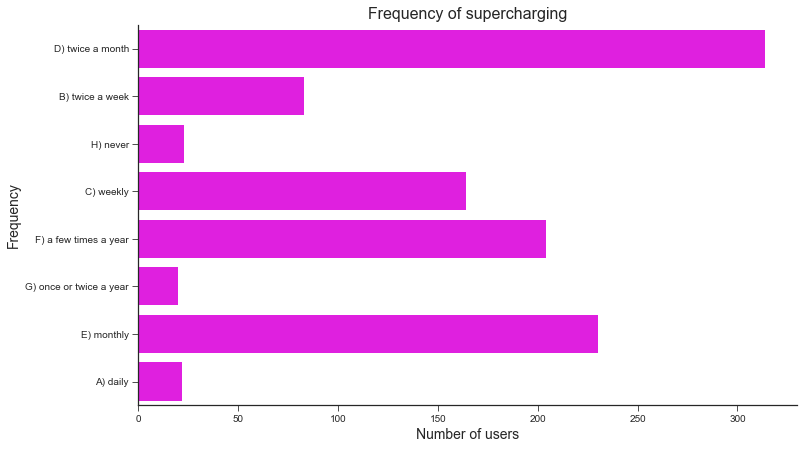

In [46]:
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.figure(figsize=(11.8, 7))
sns.countplot(data=tesla_survey, y='supercharging_frequency', color='magenta')
sns.despine()
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of supercharging', fontsize=16)
plt.show()

It seems like the majority of drivers supercharge their cars twice a month

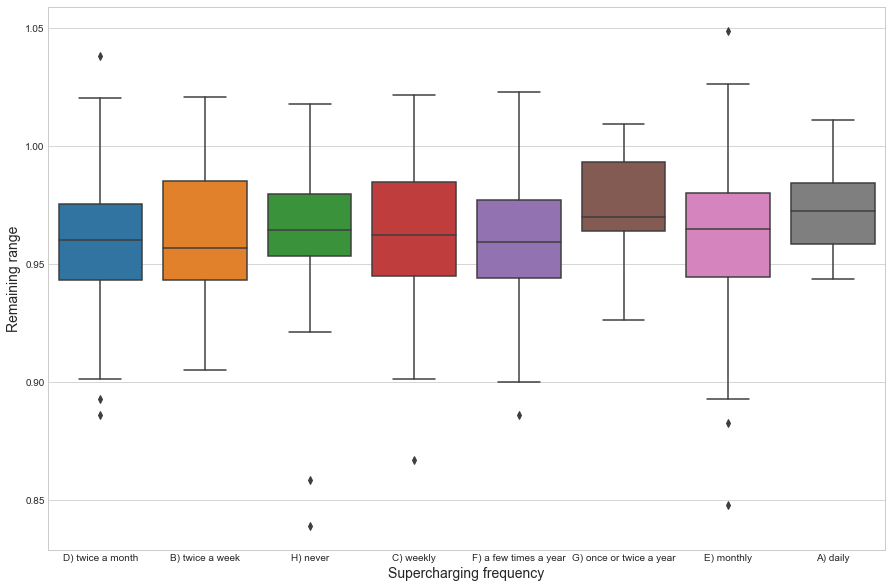

In [57]:
#check how remaining range is affected by frequency of supercharging
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='supercharging_frequency', y='remaining_range', data=tesla_survey)
plt.xlabel('Supercharging frequency', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

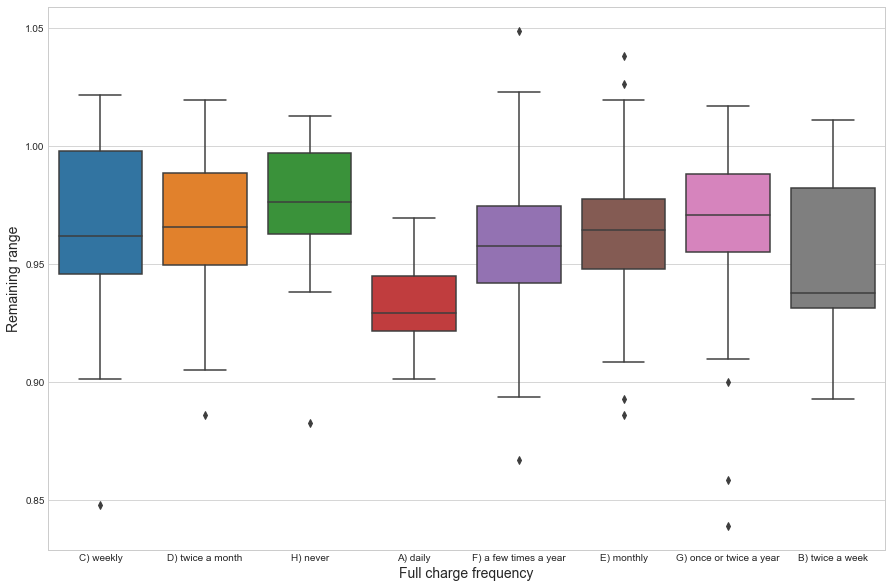

In [61]:
#check how remaining range is affected by frequency of 100% charge
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='full_charge_frequency', y='remaining_range', data=tesla_survey)
plt.xlabel('Full charge frequency', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

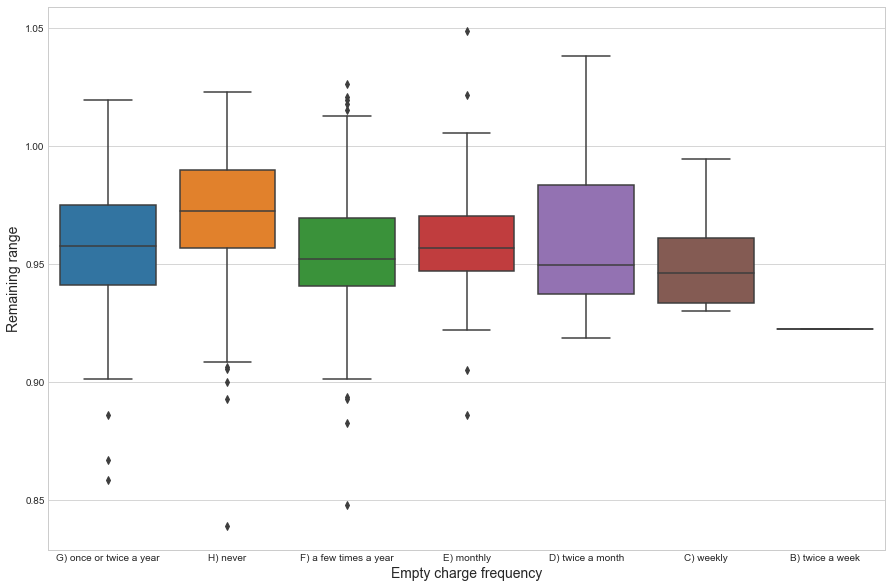

In [62]:
#check how remaining range is affected by frequency of empty charge
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='empty_charge_frequency', y='remaining_range', data=tesla_survey)
plt.xlabel('Empty charge frequency', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

<h5>Daily charge level</h5>

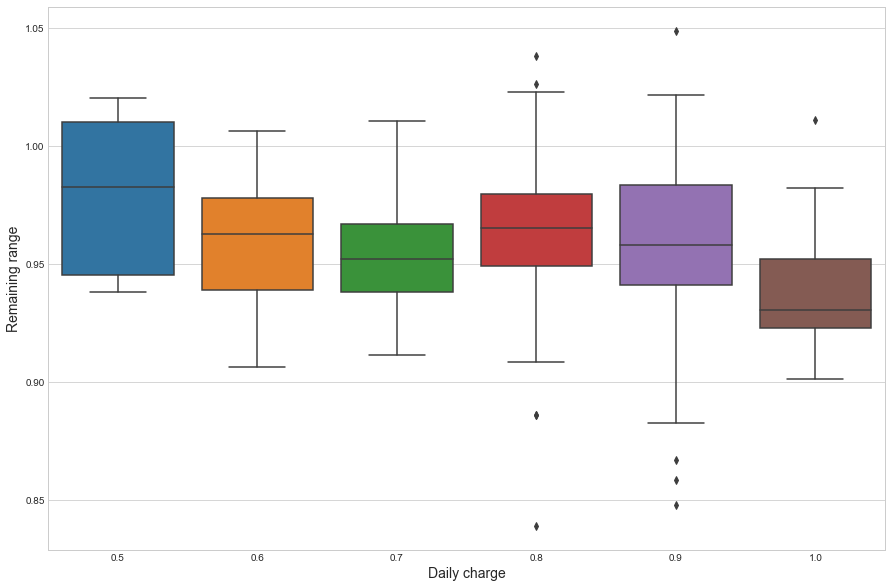

In [64]:
#check how remaining range is affected by daily charge
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='daily_charge', y='remaining_range', data=tesla_survey)
plt.xlabel('Daily charge', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()